# Progress report 2022-05-08
Daniel Mishler

- Accepted to SANDIA
    - Figuring out housing to decide on start date. Most likely May 30 or May 22.
- PaRSEC PR #531




- parsec animation utils
    - Added parameter for task dict heuristic. Little faster now.
    - --ptt-version=2?
        - Working on porting this script. Not done.
- qlength project
    - Have a queue length but something is wrong.
    - If it's a race condition, it might not be trivial





In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# For parsec_animation_utils
import parsec_animation_utils as panimate
from matplotlib.animation import FuncAnimation
from IPython import display
plt.ioff()

# Redone XSDK data

In [3]:
tilesizes = [200, 304]
numcores_list = [36,18]

In [4]:
# dgemm_xsdk_peak_36core = dgemm_xsdk_peak_smooth = pd.read_csv("2022-09-19_xsdk_mkl_dgemm_peak_more.csv")
# dgemm_xsdk_peak_36core = pd.read_csv("2023-02-13_xsdk_mkl_dgemm_peak.csv")
dgemm_xsdk_peak_36core = pd.read_csv("2023-02-27_xsdk_mkl_dgemm_peak.csv")
dgemm_xsdk_peak_18core = pd.read_csv("2023-02-27_xsdk_OMP_dgemm_peak_18core.csv") # Change fname later...
xsdk_theoretical_36core_peak = {"N": [0,10240], "GFLOPS": [3571.2, 3571.2]}
xsdk_theoretical_18core_peak = {"N": [0,10240], "GFLOPS": [1785.6, 1785.6]}
xsdk_practical_peak = {"N": [0,10240], "GFLOPS": [3168, 3168]}
dgemm_xsdk_slate_36core = {"N": [0, 10240], "GFLOPS": [1055, 1055]}
dgemm_xsdk_slate_18core = {"N": [0, 10240], "GFLOPS": [877, 877]}
dgemm_xsdk_mtest_36core = {"N": [0, 10240], "GFLOPS": [1511, 1511]}
dgemm_xsdk_mtest_18core = {"N": [0, 10240], "GFLOPS": [880, 880]}
dgemm_xsdk_mtest_36core_sts = pd.read_csv("2023-03-27_ptg_ts176_xsdk_dgemm_lfq_mtest_wctl.csv")
dgemm_xsdk_mtest_18core_sts = {"N": [0, 10240], "GFLOPS": [0,0]}

dgemm_xsdk_peak = {}
dgemm_xsdk_peak[18] = dgemm_xsdk_peak_18core
dgemm_xsdk_peak[36] = dgemm_xsdk_peak_36core

dgemm_xsdk_slate = {}
dgemm_xsdk_slate[18] = dgemm_xsdk_slate_18core
dgemm_xsdk_slate[36] = dgemm_xsdk_slate_36core

dgemm_xsdk_mtest = {}
dgemm_xsdk_mtest[18] = dgemm_xsdk_mtest_18core
dgemm_xsdk_mtest[36] = dgemm_xsdk_mtest_36core

dgemm_xsdk_ptg_lfq_mtest_sts = {}
dgemm_xsdk_ptg_lfq_mtest_sts[18] = dgemm_xsdk_mtest_18core_sts
dgemm_xsdk_ptg_lfq_mtest_sts[36] = dgemm_xsdk_mtest_36core_sts
        
dgemm_xsdk_ptg_lfq = {18: {}, 36: {}}
dgemm_xsdk_dtd_lfq = {18: {}, 36: {}}
dgemm_xsdk_dtd_lfq_reacb = {18: {}, 36: {}}
dgemm_xsdk_ptg_lfq_mtest = {18: {}, 36: {}}
dgemm_xsdk_ptg_lfq_accum6x6 = {18: {}, 36: {}}

for tilesize in tilesizes:
    dgemm_xsdk_ptg_lfq[36][tilesize]           = pd.read_csv(f"2023-02-13_ptg_ts{tilesize}_xsdk_dgemm_lfq.csv")
    dgemm_xsdk_dtd_lfq[36][tilesize]           = pd.read_csv(f"2023-02-13_dtd_ts{tilesize}_xsdk_dgemm_lfq.csv")
    dgemm_xsdk_dtd_lfq_reacb[36][tilesize]     = pd.read_csv(f"2023-02-13_dtd_ts{tilesize}_xsdk_dgemm_lfq_recursive_eacb.csv")
    dgemm_xsdk_ptg_lfq[18][tilesize]           = pd.read_csv(f"2023-02-27_ptg_ts{tilesize}_xsdk_dgemm_lfq_18core.csv")
    dgemm_xsdk_dtd_lfq[18][tilesize]           = pd.read_csv(f"2023-02-27_dtd_ts{tilesize}_xsdk_dgemm_lfq_18core.csv")
    dgemm_xsdk_dtd_lfq_reacb[18][tilesize]     = pd.read_csv(f"2023-02-27_dtd_ts{tilesize}_xsdk_dgemm_lfq_recursive_eacb_18core.csv")
    dgemm_xsdk_ptg_lfq_mtest[36][tilesize]     = pd.read_csv(f"2023-03-20_ptg_ts{tilesize}_xsdk_dgemm_lfq_mtest_wctl.csv")
    dgemm_xsdk_ptg_lfq_mtest[18][tilesize]     = {"N": [0, 10240], "GFLOPS": [0, 0]}
    dgemm_xsdk_ptg_lfq_accum6x6[36][tilesize]  = pd.read_csv(f"2023-04-03_ptg_ts{tilesize}_xsdk_dgemm_lfq_mtest_accum6x6.csv")
    dgemm_xsdk_ptg_lfq_accum6x6[18][tilesize]  = {"N": [0, 10240], "GFLOPS": [0, 0]}


In [5]:
for tilesize in tilesizes:
    for numcores in numcores_list:
        plt.figure(figsize = [10,6])
        dgemm_xsdk_peak_A              = dgemm_xsdk_peak[numcores]
        dgemm_xsdk_slate_A             = dgemm_xsdk_slate[numcores]
        dgemm_xsdk_mtest_A             = dgemm_xsdk_mtest[numcores]
        dgemm_xsdk_ptg_lfq_mtest_sts_A = dgemm_xsdk_ptg_lfq_mtest_sts[numcores]
        dgemm_xsdk_ptg_lfq_A           = dgemm_xsdk_ptg_lfq[numcores][tilesize]
        dgemm_xsdk_dtd_lfq_A           = dgemm_xsdk_dtd_lfq[numcores][tilesize]
        dgemm_xsdk_dtd_lfq_reacb_A     = dgemm_xsdk_dtd_lfq_reacb[numcores][tilesize]
        dgemm_xsdk_ptg_lfq_mtest_A     = dgemm_xsdk_ptg_lfq_mtest[numcores][tilesize]
        dgemm_xsdk_ptg_lfq_accum6x6_A  = dgemm_xsdk_ptg_lfq_accum6x6[numcores][tilesize]

    #    plt.plot(xsdk_theoretical_peak["N"],          xsdk_theoretical_peak["GFLOPS"],          "--", label = "theoretical peak")
        plt.plot(dgemm_xsdk_peak_A["N"],              dgemm_xsdk_peak_A["GFLOPS"],              "*-", label = f"{numcores}core; mkl peak")
    #    plt.plot(dgemm_xsdk_slate_A["N"],             dgemm_xsdk_slate_A["GFLOPS"],             "--", label = f"{numcores}core; slate's peak")
    #    plt.plot(dgemm_xsdk_mtest_A["N"],             dgemm_xsdk_mtest_A["GFLOPS"],             "--", label = f"{numcores}core; mtest's peak")
        plt.plot(dgemm_xsdk_ptg_lfq_A["N"],           dgemm_xsdk_ptg_lfq_A["GFLOPS"],           "*-", label = f"ts{tilesize}; {numcores}core; ptg lfq")
        plt.plot(dgemm_xsdk_dtd_lfq_A["N"],           dgemm_xsdk_dtd_lfq_A["GFLOPS"],           "*-", label = f"ts{tilesize}; {numcores}core; dtd lfq (control)")
        plt.plot(dgemm_xsdk_dtd_lfq_reacb_A["N"],     dgemm_xsdk_dtd_lfq_reacb_A["GFLOPS"],     "*-", label = f"ts{tilesize}; {numcores}core; dtd lfq reacb")
        plt.plot(dgemm_xsdk_ptg_lfq_mtest_A["N"],     dgemm_xsdk_ptg_lfq_mtest_A["GFLOPS"],     "*-", label = f"ts{tilesize}; {numcores}core; ptg lfq mtest")
        plt.plot(dgemm_xsdk_ptg_lfq_accum6x6_A["N"],  dgemm_xsdk_ptg_lfq_accum6x6_A["GFLOPS"],  "*-", label = f"ts{tilesize}; {numcores}core; ptg lfq accum6x6")
    #    plt.plot(dgemm_xsdk_ptg_lfq_mtest_sts_A["N"], dgemm_xsdk_ptg_lfq_mtest_sts_A["GFLOPS"], "*-", label = f"ts{tilesize}; {numcores}core; ptg lfq mtest ts176")


        plt.title(f"xsdk performance (Intel Xeon Gold 6254 @3.10GHZ x18 x2) (DGEMM)")
        plt.legend()
        plt.xlabel("Matrix size N")
        plt.ylabel("Performance (GFLOPS)")
        fname = f"2023-03-06_xsdk_Performance_ts{tilesize}_{numcores}core"
        plt.savefig(fname + '.svg')
        plt.savefig(fname + '.pdf')
        plt.savefig(fname + '.png')
        print(fname)

2023-03-06_xsdk_Performance_ts200_36core
2023-03-06_xsdk_Performance_ts200_18core
2023-03-06_xsdk_Performance_ts304_36core
2023-03-06_xsdk_Performance_ts304_18core


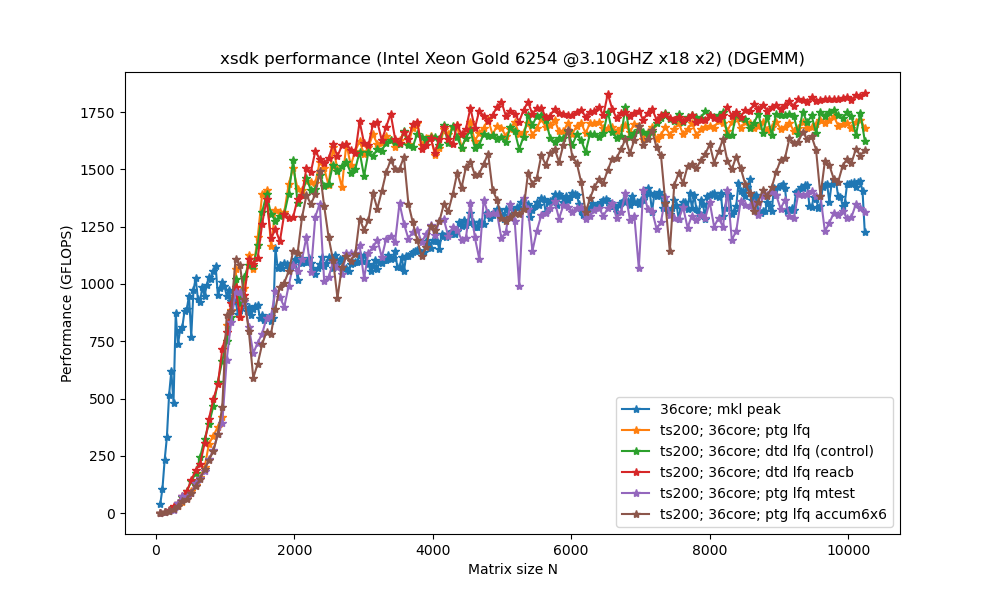

In [6]:
display.Image("2023-03-06_xsdk_Performance_ts200_36core.png")

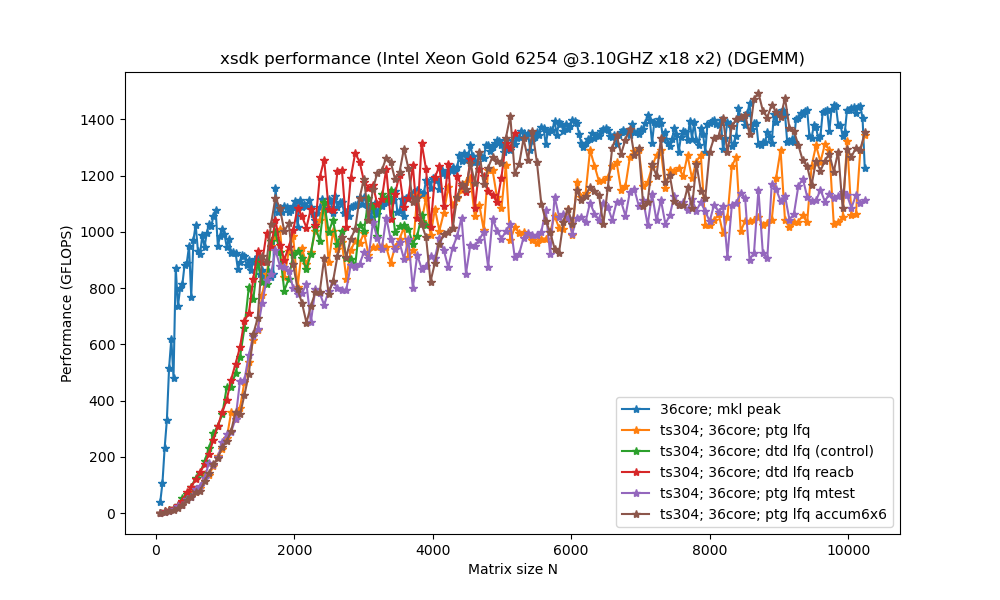

In [7]:
display.Image("2023-03-06_xsdk_Performance_ts304_36core.png")

## Trace Visualization
```
```

In [21]:
trace_xsdk_dtd_lfq_4800_normal         = pd.HDFStore("2023-01-25_xsdk_ts200_N4800_dtd_lfq_normal.prof.h5")
trace_tv2_xsdk_ptg_lfq_4800_normal     = pd.HDFStore("2023-02-13_tv2_xsdk_ts200_N4800_ptg_lfq_normal.prof.h5")
trace_xsdk_ptg_lfq_4800_normal         = pd.HDFStore("2023-02-13_xsdk_ts200_N4800_ptg_lfq_normal.prof.h5")
trace_xsdk_dtd_lfq_4800_recursive      = pd.HDFStore("2023-01-30_xsdk_ts200_N4800_dtd_lfq_recursive.prof.h5")
trace_xsdk_dtd_lfq_4800_reacb160       = pd.HDFStore("2022-11-28_xsdk_ts200_N4800_dtd_lfq_khpt1_reacb160.prof.h5")


trace_xsdk_dtd_lfq_9600_recursive      = pd.HDFStore("2023-02-13_xsdk_ts200_N9600_dtd_lfq_recursive.prof.h5")
trace_xsdk_ptg_lfq_9600_normal         = pd.HDFStore("2023-02-13_xsdk_ts200_N9600_ptg_lfq_normal.prof.h5")


trace_xsdk_dtd_lfq_2400_nowarmup       = pd.HDFStore("2023-02-02_xsdk_ts200_N2400_dtd_lfq_nowarmup.prof.h5")
trace_xsdk_dtd_lfq_2400_normal         = pd.HDFStore("2023-02-02_xsdk_ts200_N2400_dtd_lfq_normal.prof.h5")
trace_xsdk_dtd_lfq_2400_noforce        = pd.HDFStore("2023-02-02_xsdk_ts200_N2400_dtd_lfq_noforce.prof.h5")
trace_xsdk_dtd_lfq_2400_noforce        = pd.HDFStore("2023-02-04_xsdk_ts200_N2400_dtd_lfq_noforce.prof.h5")
trace_xsdk_dtd_lfq_2400_reforce        = pd.HDFStore("2023-02-02_xsdk_ts200_N2400_dtd_lfq_reforce.prof.h5")

trace_saturn_head_dtd_lfq_2400_normal     = pd.HDFStore("2023-02-14_saturn_head_ts200_N2400_dtd_lfq_normal.prof.h5")


# tsc: task starup chunk
# sb: summa for matrix B
# nk was the default
trace_xsdk_ptg_lfq_4800_tsc4096_sbNK   = pd.HDFStore("2023-02-06_xsdk_ts200_N4800_ptg_lfq_tsc4096_sbNK.prof.h5")
trace_xsdk_ptg_lfq_4800_tsc0256_sbNK   = pd.HDFStore("2023-02-06_xsdk_ts200_N4800_ptg_lfq_tsc0256_sbNK.prof.h5")
trace_xsdk_ptg_lfq_4800_tsc4096_sbKN   = pd.HDFStore("2023-02-06_xsdk_ts200_N4800_ptg_lfq_tsc4096_sbKN.prof.h5")
trace_xsdk_ptg_lfq_4800_tsc0256_sbKN   = pd.HDFStore("2023-02-06_xsdk_ts200_N4800_ptg_lfq_tsc0256_sbKN.prof.h5")
trace_xsdk_dtd_lfq_4800_tsc4096        = pd.HDFStore("2023-02-06_xsdk_ts200_N4800_dtd_lfq_tsc4096.prof.h5")
trace_xsdk_dtd_lfq_4800_tsc0256        = pd.HDFStore("2023-02-06_xsdk_ts200_N4800_dtd_lfq_tsc0256.prof.h5")


# just a sanity check
trace_xsdk_dtd_lfq_4800_tracetest      = pd.HDFStore("2023-02-27_xsdk_ts200_N4800_ptg_lfq_tracetest.prof.h5")

# mtests
trace_xsdk_ptg_lfq_4800_ndependence    = pd.HDFStore("2023-03-06_xsdk_ts200_N4800_ptg_lfq_ndependence.prof.h5")
trace_xsdk_ptg_lfq_4800_ndependence2   = pd.HDFStore("2023-03-06_xsdk_ts200_N4800_ptg_lfq_ndependence2.prof.h5")
trace_xsdk_ptg_lfq_4800_n6dependence   = pd.HDFStore("2023-03-06_xsdk_ts200_N4800_ptg_lfq_n6dependence.prof.h5")
trace_xsdk_ptg_lfq_4800_allreadfirst   = pd.HDFStore("2023-03-06_xsdk_ts200_N4800_ptg_lfq_allreadfirst.prof.h5")
#mnenforcement: all reads done first plus m and n are dependent on the previous one, +6
trace_xsdk_ptg_lfq_4800_mnenforcement  = pd.HDFStore("2023-03-06_xsdk_ts200_N4800_ptg_lfq_mnenforcement.prof.h5")
#mnk: also adds in the enforcement for k
trace_xsdk_ptg_lfq_4800_mnkenforcement = pd.HDFStore("2023-03-06_xsdk_ts200_N4800_ptg_lfq_mnkenforcement.prof.h5")
trace_xsdk_ptg_lfq_4800_allreadfirst   = pd.HDFStore("2023-03-20_xsdk_ts200_N4800_ptg_lfq_allreadfirst.prof.h5")
trace_xsdk_ptg_lfq_4224_allreadfirst   = pd.HDFStore("2023-03-27_xsdk_ts176_N4224_ptg_lfq_allreadfirst.prof.h5")



trace_xsdk_ptg_lfq_48000_allreadfirst  = pd.HDFStore("2023-03-20_xsdk_ts200_N48000_ptg_lfq_allreadfirst.prof.h5")

trace_xsdk_ptg_lfq_4800_boggeddown     = pd.HDFStore("2023-04-03_xsdk_ts200_N4800_ptg_lfq_boggeddown.prof.h5")
trace_xsdk_ptg_lfq_4800_accumulator6x6 = pd.HDFStore("2023-04-03_xsdk_ts200_N4800_ptg_lfq_accumulator6x6.prof.h5")
trace_xsdk_ptg_lfq_4800_accumulator6x6_k45 = pd.HDFStore("2023-04-03_xsdk_ts200_N4800_ptg_lfq_accumulator6x6_k45.prof.h5")


# With "qlength"
trace_xsdk_ptg_lfq_4800_normal         = pd.HDFStore("2023-05-01_xsdk_ts200_N4800_ptg_lfq_normal.prof.h5")
trace_xsdk_dtd_lfq_4800_normal         = pd.HDFStore("2023-05-01_xsdk_ts200_N4800_dtd_lfq_normal.prof.h5")


## Qlength

In [14]:
trace_xsdk_ptg_lfq_4800_normal.event_types

N/A                                0
TASK_MEMORY                        1
Device delegate                    2
PARSEC RUNTIME::PREPARE_INPUT      3
PARSEC RUNTIME::RELEASE_DEPS       4
PARSEC RUNTIME::ACTIVATE_CB        5
PARSEC RUNTIME::DATA_FLUSH         6
PARSEC RUNTIME::SCHEDULE_TASKS     7
PARSEC RUNTIME::COMPLETE_EXEC      8
cuda                               9
movein                            10
moveout                           11
prefetch                          12
gpu_mem_alloc                     13
gpu_mem_use                       14
apply::APPLY_DIAG                 15
apply::APPLY_U                    16
apply::APPLY_L                    17
MPI_ACTIVATE                      18
MPI_DATA_CTL                      19
MPI_DATA_PLD_SND                  20
MPI_DATA_PLD_RCV                  21
dgemm_NN_summa::GEMM              22
dgemm_NN_summa::RING_B            23
dgemm_NN_summa::READ_B            24
dgemm_NN_summa::RING_A            25
dgemm_NN_summa::READ_A            26
d

In [18]:
trace_xsdk_ptg_lfq_4800_normal.events

,node_id,stream_id,taskpool_id,type,begin,end,flags,id,m,loc_A,priority,tcid,dc_key,trc,n,k,qlength,dc_dataid
0,0,0,-1,3,15363154,15364019,0,0,None,None,None,None,None,None,None,None,None,None
1,0,0,2,17,15364319,16137823,0,201,18,None,0,0,140732766956400,0,8,None,None,210
2,0,0,-1,8,16138115,16139826,0,0,None,None,None,None,None,None,None,None,None,None
3,0,0,2,4,16138706,16139079,1,201,None,None,None,0,None,None,None,None,None,None
4,0,0,-1,3,18592392,18593308,0,0,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,0,31,10,4,344341266,344343281,1,547,None,None,None,0,None,None,None,None,NaN,None
8062,0,31,-1,3,344402279,344405667,0,0,None,None,None,None,None,None,None,None,NaN,None
8063,0,31,10,26,344405731,344405771,0,307,19,0,0,0,140732766956400,0,None,12,NaN,307
8064,0,31,-1,8,344405855,344407995,0,0,None,None,None,None,None,None,None,None,NaN,None


In [20]:
trace_xsdk_ptg_lfq_4800_normal.events[trace_xsdk_ptg_lfq_4800_normal.events.type == 7]

,node_id,stream_id,taskpool_id,type,begin,end,flags,id,m,loc_A,priority,tcid,dc_key,trc,n,k,qlength,dc_dataid
220,0,1,-1,7,20635062,20635176,1,0,None,None,None,None,None,None,None,None,1,None
358,0,2,-1,7,33540,34379,1,0,None,None,None,None,None,None,None,None,2,None
416,0,2,-1,7,20328943,20329484,1,0,None,None,None,None,None,None,None,None,2,None
420,0,2,-1,7,20384352,20387821,1,0,None,None,None,None,None,None,None,None,2,None
421,0,2,-1,7,20389816,20390184,1,0,None,None,None,None,None,None,None,None,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,0,13,-1,7,98369402,98370294,1,0,None,None,None,None,None,None,None,None,33,None
6696,0,13,-1,7,98411633,98413137,1,0,None,None,None,None,None,None,None,None,65,None
6697,0,13,-1,7,98444265,98445162,1,0,None,None,None,None,None,None,None,None,65,None
6698,0,13,-1,7,98475712,98476000,1,0,None,None,None,None,None,None,None,None,65,None


In [10]:
panimate.animate_trace(trace_xsdk_ptg_lfq_4800_normal,
                     "gemm",
                     which_animate = "abcprogress",
                     title = "xsdk; ptg; lfq sched; normal",
                     num_frames = 60,
                     fps = 10,
                     N = 4800,
                     M = 4800,
                     K = 4800,
                     tilesize = 200)

Beginning animation of data 'xsdk; ptg; lfq sched; normal' method 'abcprogress'
considering event type 22
considering event type 23
considering event type 24
considering event type 25
considering event type 26
Error: file trace does not have its event_types set properly
found 0 events, expected 1
None


In [23]:
panimate.animate_trace(trace_xsdk_dtd_lfq_4800_normal,
                     "gemm",
                     order_func = panimate.sequential_order_generator,
                     which_animate = "abcprogress",
                     title = "xsdk; ptg; lfq sched; normal",
                     num_frames = 60,
                     fps = 10,
                     N = 4800,
                     M = 4800,
                     K = 4800,
                     tilesize = 200)

Beginning animation of data 'xsdk; ptg; lfq sched; normal' method 'abcprogress'
{'gemm': 24}
time to make df: 2.241874 seconds
time to sort df: 0.012840 seconds
process runtime per frame: 0.002711 seconds
estimated video compile time (assuming a lightweight commercial processor): 43.928131 seconds
[######################################################################]

saved all orderdf data: (xsdk; ptg; lfq sched; normal)_orderdf_data.csv
saved tasks at frame data: (xsdk; ptg; lfq sched; normal)_tasks_per_frame.csv
Data titled 'xsdk; ptg; lfq sched; normal'
interface: dtd	scheduler: lfq	running system: dplasma
hostname: xsdk.icl.utk.edu
M=4800,	N=4800,	K=4800,	tilesize=200
GEMM performance: 1359.652520 GFLOPS

core utilization: 33.972535 over 36 cores (94.37%)
    (so 5.63% price of overhead)
efficiency utilization: 56.56% (based on the amount of time a task *should* take)
GEMM core migration percentage: 6.507%
average task execution time (ms): 0.399779
core migrations + first touches: 1438
simulated L2 misses: 28740
simulated L3 misses: 17376
simulated MM misses: 1728

execution time to preprocess data: 9.379337 seconds
execution time to generate graphs: 21.595092 seconds
execution time total: 30.974429 seconds




## Pseudocode

In [55]:
mytrace = trace_xsdk_ptg_lfq_4800_normal

In [56]:
mytrace.keys()

['/errors',
 '/event_attributes',
 '/event_convertors',
 '/event_names',
 '/event_types',
 '/events',
 '/information',
 '/nodes',
 '/streams']

In [57]:
mytrace.event_types

N/A                                0
TASK_MEMORY                        1
Device delegate                    2
PARSEC RUNTIME::PREPARE_INPUT      3
PARSEC RUNTIME::RELEASE_DEPS       4
PARSEC RUNTIME::ACTIVATE_CB        5
PARSEC RUNTIME::DATA_FLUSH         6
PARSEC RUNTIME::SCHEDULE_TASKS     7
PARSEC RUNTIME::COMPLETE_EXEC      8
cuda                               9
movein                            10
moveout                           11
prefetch                          12
gpu_mem_alloc                     13
gpu_mem_use                       14
apply::APPLY_DIAG                 15
apply::APPLY_U                    16
apply::APPLY_L                    17
MPI_ACTIVATE                      18
MPI_DATA_CTL                      19
MPI_DATA_PLD_SND                  20
MPI_DATA_PLD_RCV                  21
dgemm_NN_summa::GEMM              22
dgemm_NN_summa::RING_B            23
dgemm_NN_summa::READ_B            24
dgemm_NN_summa::RING_A            25
dgemm_NN_summa::READ_A            26
d

In [58]:
stevent_num = mytrace.event_types["PARSEC RUNTIME::SCHEDULE_TASKS"]

In [59]:
tevents = mytrace.events

In [60]:
stevents = tevents[tevents.type == stevent_num]

In [61]:
total_tasks = 0
for index, event in stevents.iterrows():
    total_tasks += event["qlength"]

In [62]:
total_tasks

2004

In [63]:
for key in mytrace.event_types:
    print(f"{key}:  {len(tevents[tevents.type == key])}")

0:  0
1:  0
2:  0
3:  1997
4:  1980
5:  0
6:  0
7:  110
8:  1999
9:  0
10:  0
11:  0
12:  0
13:  0
14:  0
15:  0
16:  0
17:  828
18:  0
19:  0
20:  0
21:  0
22:  0
23:  0
24:  0
25:  0
26:  1152


In [65]:
828+1152

1980

# PTG
## Control the flow of tasks for no migrations
See April 24 for DTD comparison

In [11]:
panimate.animate_trace(trace_xsdk_ptg_lfq_4800_accumulator6x6_k45,
                     "gemm",
                     panimate.sequential_order_generator,
                     which_animate = "abcprogress",
                     title = "xsdk; ptg; lfq sched; accumulator6x6_k45",
                     num_frames = 60,
                     fps = 10,
                     N = 4800,
                     M = 4800,
                     K = 4800,
                     tilesize = 200,
                     task_to_trace = {'gemm': 22})

Beginning animation of data 'xsdk; ptg; lfq sched; accumulator6x6_k45' method 'abcprogress'
time to make df: 8.229241 seconds
time to sort df: 0.053855 seconds
Because 41472 % 13824 is 0, I will assume you included a warmup and I will consider the last 13824 tasks
since this is PTG, I am taking taskpool id 12
now len is 13824
process runtime per frame: 0.002085 seconds
estimated video compile time (assuming a lightweight commercial processor): 43.928131 seconds
[########################----------------------------------------------]-------------------------------------]

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '650x650', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpjq6qmgov/temp.m4v']' returned non-zero exit status 255.

In [ ]:
fname = panimate.generate_simulated_cache_hit_graph("(xsdk; ptg; lfq sched; accumulator6x6_k45)_orderdf_data.csv",
                                                    title="MNK enforcement",
                                                    cache="L3",
                                                    window=1.0,
                                                    sortby="begin",
                                                    figsize=[8,8])
print(fname)
display.Image(fname)

## Move the script to v2

In [66]:
trace_saturn_a_ptg_lfq_4800_normal_tv1 = pd.HDFStore("2023-04-26_saturn_a_ts200_N4800_ptg_lfq_normal_tv1.prof.h5")
trace_saturn_a_ptg_lfq_4800_normal_tv2 = pd.HDFStore("2023-04-26_saturn_a_ts200_N4800_ptg_lfq_normal_tv2.prof.h5")

In [67]:
trace_xsdk_ptg_lfq_4800_normal_tv1 = pd.HDFStore("2023-04-28_xsdk_ts200_N4800_ptg_lfq_normal_tv1.prof.h5")
trace_xsdk_ptg_lfq_4800_normal_tv2 = pd.HDFStore("2023-04-28_xsdk_ts200_N4800_ptg_lfq_normal_tv2.prof.h5")

In [4]:
trace_tv1_xsdk_dtd_lfq_4800_normal = pd.HDFStore("2023-05-01_xsdk_ts200_N4800_dtd_lfq_normal_tv1.prof.h5")
trace_tv2_xsdk_dtd_lfq_4800_normal = pd.HDFStore("2023-05-01_xsdk_ts200_N4800_dtd_lfq_normal_tv2.prof.h5")

In [5]:
tv1 = trace_tv1_xsdk_dtd_lfq_4800_normal
tv2 = trace_tv2_xsdk_dtd_lfq_4800_normal

In [6]:
tv1['nodes']['filename']

0    2023-05-01_xsdk_ts200_N4800_dtd_lfq_normal_tv1...
Name: filename, dtype: object

In [6]:
# Just for testing
tv1['nodes']['filename'] = "force_fname_match"
tv2['nodes']['filename'] = "force_fname_match"
# Woah... why doesn't this work?

In [7]:
tv1['nodes']['filename']

0    2023-05-01_xsdk_ts200_N4800_dtd_lfq_normal_tv1...
Name: filename, dtype: object

In [8]:
tv2.keys()

['/errors',
 '/event_attributes',
 '/event_convertors',
 '/event_infos_0',
 '/event_infos_1',
 '/event_infos_10',
 '/event_infos_11',
 '/event_infos_12',
 '/event_infos_13',
 '/event_infos_14',
 '/event_infos_15',
 '/event_infos_16',
 '/event_infos_17',
 '/event_infos_18',
 '/event_infos_19',
 '/event_infos_2',
 '/event_infos_20',
 '/event_infos_21',
 '/event_infos_22',
 '/event_infos_23',
 '/event_infos_24',
 '/event_infos_25',
 '/event_infos_3',
 '/event_infos_4',
 '/event_infos_5',
 '/event_infos_6',
 '/event_infos_7',
 '/event_infos_8',
 '/event_infos_9',
 '/event_names',
 '/event_types',
 '/events',
 '/information',
 '/nodes',
 '/streams']

In [9]:
tv1.keys()

['/errors',
 '/event_attributes',
 '/event_convertors',
 '/event_names',
 '/event_types',
 '/events',
 '/information',
 '/nodes',
 '/streams']

In [50]:
def compare_entries(a, b):
    if type(a) not in [pd.core.frame.DataFrame, pd.core.series.Series]:
        print("CE ERROR: unknown type for a")
        return False
    if type(b) not in [pd.core.frame.DataFrame, pd.core.series.Series]:
        print("CE ERROR: unknown type for b")
        return False
    if(len(a) != len(b)):
        print("CE ERROR: lengths do not match")
        return False
    if type(a) is pd.core.frame.DataFrame and type(b) is pd.core.frame.DataFrame:
        # realign axes
        a = a[b.columns]
        comparison_obj = a.compare(b)
    else:
        comparison_obj = (a == b)
    if(len(comparison_obj) == 0):
        return True
    if(type(comparison_obj) is pd.core.series.Series):
        if comparison_obj.any() == False:
            return False
        else:
            return True
    if(type(comparison_obj) is pd.core.frame.DataFrame):
        for key in comparison_obj:
            if comparison_obj[key].any() == False:
                return False
        # else
        return True

In [52]:
def tv1_events_from_tv2_trace(v2trace):
    events = v2trace['events']
    new_cols = set()
    for i in range(len(tv2['event_types'])):
        for col in tv2[f'event_infos_{i}']:
            new_cols.add(col)
    for col in new_cols:
        events[col] = None
    for i in range(len(tv2['event_types'])):
        events.update(tv2[f'event_infos_{i}'])
    return events

In [54]:
events = tv1_events_from_tv2_trace(tv2)

In [55]:
compare_entries(events, tv1['events'])

df compare


True

In [51]:
for key in ["errors", "event_attributes", "event_convertors",
            "event_names", "event_types", "information", "nodes", "streams"]:
    match = compare_entries(tv1[key], tv2[key])
    print(f"{key} keymatch is {match}")

df compare
errors keymatch is True
event_attributes keymatch is True
df compare
event_convertors keymatch is True
event_names keymatch is True
event_types keymatch is True
information keymatch is True
df compare
nodes keymatch is True
df compare
streams keymatch is True


In [ ]:
(tv1['nodes'] == tv2['nodes'])

In [21]:
tv2['event_types']

N/A                                0
TASK_MEMORY                        1
Device delegate                    2
PARSEC RUNTIME::PREPARE_INPUT      3
PARSEC RUNTIME::RELEASE_DEPS       4
PARSEC RUNTIME::ACTIVATE_CB        5
PARSEC RUNTIME::DATA_FLUSH         6
PARSEC RUNTIME::SCHEDULE_TASKS     7
PARSEC RUNTIME::COMPLETE_EXEC      8
cuda                               9
movein                            10
moveout                           11
prefetch                          12
gpu_mem_alloc                     13
gpu_mem_use                       14
dtd_data_flush                    15
apply::APPLY_DIAG                 16
apply::APPLY_U                    17
apply::APPLY_L                    18
MPI_ACTIVATE                      19
MPI_DATA_CTL                      20
MPI_DATA_PLD_SND                  21
MPI_DATA_PLD_RCV                  22
parsec_dtd_data_flush             23
Gemm                              24
Fake_FIRST_OUT                    25
dtype: int64

In [22]:
for i in range(26):
    print(i, tv2[f'event_infos_{i}'])

0 Empty DataFrame
Columns: []
Index: []
1 Empty DataFrame
Columns: []
Index: []
2 Empty DataFrame
Columns: []
Index: []
3 Empty DataFrame
Columns: []
Index: [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, ...]

[20512 rows x 0 columns]
4        tcid
3         0
7         0
11        0
15        0
19        0
...     ...
96653     1
96657     1
96661     0
96703     0
96759     0

[35394 rows x 1 columns]
5 Empty DataFrame
Columns: []
Index: []
6 Empty DataFrame
Columns: []
Index: [91491, 92142, 93295]
7        qlength
1429         1
1435         1
1441         1
1447  

In [12]:
tv2['events']

,node_id,stream_id,taskpool_id,type,begin,end,flags,id
0,0,4,-1,3,87299,95664,0,0
1,0,4,3,18,96234,2491300,0,0
2,0,4,-1,8,2492461,2495918,0,0
3,0,4,3,4,2493615,2494611,1,0
4,0,4,-1,3,2498541,2500423,0,0
...,...,...,...,...,...,...,...,...
96777,0,3,-1,7,203263511,203263729,1,0
96778,0,3,-1,3,203272624,203272701,0,0
96779,0,3,-1,7,203272774,203272812,1,0
96780,0,3,-1,3,203276606,203276679,0,0


## Set new cols

In [8]:
events = tv2['events']

In [9]:
print(events)

       node_id  stream_id  taskpool_id  type      begin        end  flags  id
0            0          4           -1     3      87299      95664      0   0
1            0          4            3    18      96234    2491300      0   0
2            0          4           -1     8    2492461    2495918      0   0
3            0          4            3     4    2493615    2494611      1   0
4            0          4           -1     3    2498541    2500423      0   0
...        ...        ...          ...   ...        ...        ...    ...  ..
96777        0          3           -1     7  203263511  203263729      1   0
96778        0          3           -1     3  203272624  203272701      0   0
96779        0          3           -1     7  203272774  203272812      1   0
96780        0          3           -1     3  203276606  203276679      0   0
96781        0          3           -1     7  203276745  203276781      1   0

[96782 rows x 8 columns]


In [10]:
new_cols = set()
for i in range(len(tv2['event_types'])):
    for col in tv2[f'event_infos_{i}']:
        new_cols.add(col)

In [11]:
new_cols

{'dc_dataid', 'dc_key', 'm', 'n', 'priority', 'qlength', 'tcid', 'trc'}

In [12]:
for col in new_cols:
    events[col] = None

In [13]:
events

,node_id,stream_id,taskpool_id,type,begin,end,flags,id,qlength,tcid,n,dc_dataid,dc_key,trc,m,priority
0,0,4,-1,3,87299,95664,0,0,None,None,None,None,None,None,None,None
1,0,4,3,18,96234,2491300,0,0,None,None,None,None,None,None,None,None
2,0,4,-1,8,2492461,2495918,0,0,None,None,None,None,None,None,None,None
3,0,4,3,4,2493615,2494611,1,0,None,None,None,None,None,None,None,None
4,0,4,-1,3,2498541,2500423,0,0,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96777,0,3,-1,7,203263511,203263729,1,0,None,None,None,None,None,None,None,None
96778,0,3,-1,3,203272624,203272701,0,0,None,None,None,None,None,None,None,None
96779,0,3,-1,7,203272774,203272812,1,0,None,None,None,None,None,None,None,None
96780,0,3,-1,3,203276606,203276679,0,0,None,None,None,None,None,None,None,None


In [14]:
for i in range(26):
    events.update(tv2[f'event_infos_{i}'])

In [15]:
events

,node_id,stream_id,taskpool_id,type,begin,end,flags,id,qlength,tcid,n,dc_dataid,dc_key,trc,m,priority
0,0,4,-1,3,87299,95664,0,0,None,None,None,None,None,None,None,None
1,0,4,3,18,96234,2491300,0,0,None,0.0,0.0,1.0,140723463777712.0,0.0,1.0,0.0
2,0,4,-1,8,2492461,2495918,0,0,None,None,None,None,None,None,None,None
3,0,4,3,4,2493615,2494611,1,0,None,0.0,None,None,None,None,None,None
4,0,4,-1,3,2498541,2500423,0,0,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96777,0,3,-1,7,203263511,203263729,1,0,1.0,None,None,None,None,None,None,None
96778,0,3,-1,3,203272624,203272701,0,0,None,None,None,None,None,None,None,None
96779,0,3,-1,7,203272774,203272812,1,0,1.0,None,None,None,None,None,None,None
96780,0,3,-1,3,203276606,203276679,0,0,None,None,None,None,None,None,None,None


In [18]:
tv1events = tv1['events']

In [21]:
tv1events.columns

Index(['node_id', 'stream_id', 'taskpool_id', 'type', 'begin', 'end', 'flags',
       'id', 'qlength', 'tcid', 'trc', 'dc_key', 'n', 'dc_dataid', 'priority',
       'm'],
      dtype='object')

In [22]:
reordered_events = events[tv1events.columns]

In [34]:
comparison = reordered_events.compare(tv1['events'])

In [38]:
len(comparison)

0

In [41]:
reordered_events == tv1events

,node_id,stream_id,taskpool_id,type,begin,end,flags,id,qlength,tcid,trc,dc_key,n,dc_dataid,priority,m
0,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96777,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False
96778,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
96779,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False
96780,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False


In [45]:
reordered_events.head()

,node_id,stream_id,taskpool_id,type,begin,end,flags,id,qlength,tcid,trc,dc_key,n,dc_dataid,priority,m
0,0,4,-1,3,87299,95664,0,0,None,None,None,None,None,None,None,None
1,0,4,3,18,96234,2491300,0,0,None,0.0,0.0,140723463777712.0,0.0,1.0,0.0,1.0
2,0,4,-1,8,2492461,2495918,0,0,None,None,None,None,None,None,None,None
3,0,4,3,4,2493615,2494611,1,0,None,0.0,None,None,None,None,None,None
4,0,4,-1,3,2498541,2500423,0,0,None,None,None,None,None,None,None,None


In [44]:
tv1events.head()

,node_id,stream_id,taskpool_id,type,begin,end,flags,id,qlength,tcid,trc,dc_key,n,dc_dataid,priority,m
0,0,4,-1,3,87299,95664,0,0,None,None,None,None,None,None,None,None
1,0,4,3,18,96234,2491300,0,0,None,0,0,140723463777712,0,1,0,1
2,0,4,-1,8,2492461,2495918,0,0,None,None,None,None,None,None,None,None
3,0,4,3,4,2493615,2494611,1,0,None,0,None,None,None,None,None,None
4,0,4,-1,3,2498541,2500423,0,0,None,None,None,None,None,None,None,None


In [39]:
print(reordered_events['qlength'][0])
print(type(reordered_events['qlength'][0]))

None
<class 'NoneType'>


In [40]:
print(tv1events['qlength'][0])
print(type(tv1events['qlength'][0]))

None
<class 'NoneType'>


In [32]:
reordered_events['qlength'][0] == tv1events['qlength'][0]

True

In [137]:
type(events['priority'][1])

float

In [142]:
type(tv1['errors'])

pandas.core.frame.DataFrame

In [143]:
len(tv2['event_convertors'])

18

In [144]:
tv1['event_convertors'].keys()

Index(['fmt', 'event_len', 'event_name'], dtype='object')

In [145]:
for key in tv1['event_convertors'].keys():
    print(key)
for key in tv1['event_convertors']:
    print(key)

fmt
event_len
event_name
fmt
event_len
event_name


In [146]:
tv1['event_types'].keys()

Index(['N/A', 'TASK_MEMORY', 'Device delegate',
       'PARSEC RUNTIME::PREPARE_INPUT', 'PARSEC RUNTIME::RELEASE_DEPS',
       'PARSEC RUNTIME::ACTIVATE_CB', 'PARSEC RUNTIME::DATA_FLUSH',
       'PARSEC RUNTIME::SCHEDULE_TASKS', 'PARSEC RUNTIME::COMPLETE_EXEC',
       'cuda', 'movein', 'moveout', 'prefetch', 'gpu_mem_alloc', 'gpu_mem_use',
       'dtd_data_flush', 'apply::APPLY_DIAG', 'apply::APPLY_U',
       'apply::APPLY_L', 'MPI_ACTIVATE', 'MPI_DATA_CTL', 'MPI_DATA_PLD_SND',
       'MPI_DATA_PLD_RCV', 'parsec_dtd_data_flush', 'Gemm', 'Fake_FIRST_OUT'],
      dtype='object')

In [147]:
(tv1['nodes'] == tv2['nodes'])

,exe,filename,id,error,DIMENSION,DIMENSION_list,sched,DEVICE_MODULES,PINS_MODULES,GIT_HASH,GIT_BRANCH,nb_vps,nb_cores,CMDLINE,HWLOC-XML,cwd,hostname,exe_abspath
0,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [148]:
tv1['nodes']["filename"]

0    2023-05-01_xsdk_ts200_N4800_dtd_lfq_normal_tv1...
Name: filename, dtype: object

In [149]:
type((tv1['event_types'] == tv2['event_types']))

pandas.core.series.Series

In [65]:
tv1['events']

,node_id,stream_id,taskpool_id,type,begin,end,flags,id,qlength,tcid,trc,dc_key,n,dc_dataid,priority,m
0,0,4,-1,3,87299,95664,0,0,None,None,None,None,None,None,None,None
1,0,4,3,18,96234,2491300,0,0,None,0,0,140723463777712,0,1,0,1
2,0,4,-1,8,2492461,2495918,0,0,None,None,None,None,None,None,None,None
3,0,4,3,4,2493615,2494611,1,0,None,0,None,None,None,None,None,None
4,0,4,-1,3,2498541,2500423,0,0,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96777,0,3,-1,7,203263511,203263729,1,0,1,None,None,None,None,None,None,None
96778,0,3,-1,3,203272624,203272701,0,0,None,None,None,None,None,None,None,None
96779,0,3,-1,7,203272774,203272812,1,0,1,None,None,None,None,None,None,None
96780,0,3,-1,3,203276606,203276679,0,0,None,None,None,None,None,None,None,None


## Feedback
Didn't have much to report today
- TODO #1: qlength and races
    - Don't use globals in trace, handle that *later*
    - I had a number of race conditions in my current version
    - It still doesn't quite add up. Why? Ask Thomas.
        - *Before* meeting, says George
    - and if you want to do semaphores, they recommend atomic add
- TODO #2: v2
    - keep scripting for v2
    - Make a script that converts v1 trace to v2 trace
    - See what needs to be done to get ptt v2 on master
- Sameer got married, congrats!





### Leftover todos

- TODO #1: write a CI check to add to the github checks so we'll know
  if we break it
    - Need to start early for this one
    - What does CI stand for
    - Still, what is summa?
- TODO #2: Include Chameleon on XSDK
- TODO #3: side-by-side data with graphs
- TODO #4: (from last week): memory pressure
    - Consider if a metric like tasks occupied average might correlate
      with task duration
    - see if there are bottlenecks on L2, L3, NUMA, etc.
    - Are other tasks making noise on the bus?
    - More evidence needed for a conclusion
    - occupation is probably not a good enough metric by itself
    - consider links to each memory. First model should probably just
      consider NUMA
        - If many processes need to use the same link to NUMA at
          the same time, the tasks may be slow
- TODO #5: other machines
- TODO #6: Try running my stuff on GPUs
- TODO #7: what the heck with xsdk?
    - Follow up with Geri
    - Remember: `OMP_PROC_BIND=[master,spread,close]`
    - Remember: `OMP_PLACES=cores`
- TODO #8: edit the mask in the PR. Get `COMPLETE_EXEC`.
    - Reach out to Joseph if necessary
    - We don't just need begin and end, we need to look at the
      completion after the thread has let all know the data is ready.
    - George: it's an expensive operation that takes one atomic
      operation per task in the best case
    - We might learn the cost per successor here
- TODO #9: compability with Joseph's trace
    - Add cache info on his traces. See April 24 notes for more.


### Time
```
- Yicheng:     13:05 - 13:56 (51 minutes)
- Danny:       13:56 - 14:07 (11 minutes)
- Jiali:       14:09 - 14:55 (46 minutes)
- Yicheng:     14:55 - 14:57 (02 minutes)
```